In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, norm

**Cравнить средние двумя способами: бутстрапом и u-тестом**

In [3]:
df = pd.read_csv('hw5.csv', delimiter=';', index_col=0)
df['value'] = pd.to_numeric([i.replace(',','.') for i in df['value'].values])
df.head()

,value,experimentVariant
1,9.773113,Treatment
2,9.311246,Treatment
3,11.172828,Treatment
4,11.624510,Treatment
5,10.462331,Treatment


In [4]:
df.shape

(550, 2)

In [26]:
df[df['experimentVariant'] == 'Treatment'].shape[0]

50

In [27]:
df[df['experimentVariant'] == 'Control'].shape[0]

500

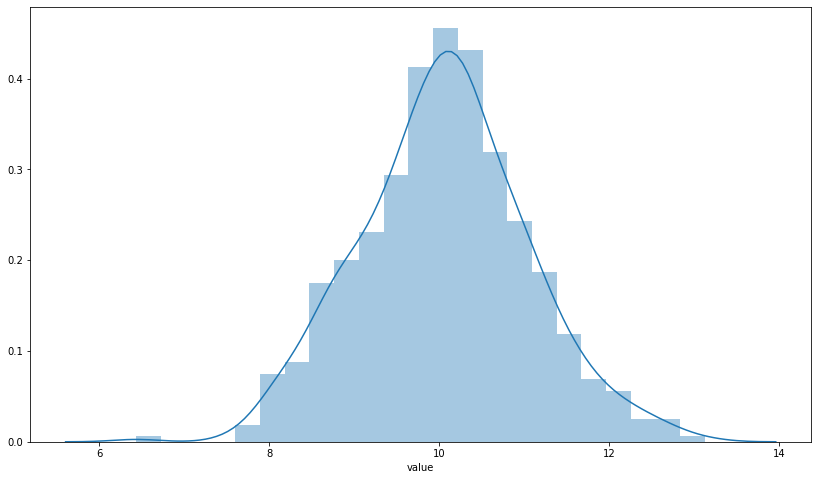

In [9]:
plt.figure(figsize=(14,8))
sns.distplot(df['value']);

In [50]:
def bootstrap_estimation(df1, df2, boot_it, statistics, confidence_level):
    boot_data = []
    
    for i in range(boot_it):
        samples_1 = df1.sample(
            len(df1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = df2.sample(
            len(df2), 
            replace = True
        ).values
        
        boot_data.append(statistics(samples_1)-statistics(samples_2)) # для несбалансированных выборок
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - confidence_level)/2
    right_quant = 1 - (1 - confidence_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
    
    return ci

In [51]:
bootstrap_estimation(df.loc[df['experimentVariant'] == 'Treatment', 'value'],
                     df.loc[df['experimentVariant'] == 'Control', 'value'],
                     boot_it=int(df.shape[0]), 
                     statistics=np.mean,
                    confidence_level=0.95)

,0
0.025,0.045225
0.975,0.619353


In [52]:
# переход от вещественных чисел к рангам
def make_ranks(group: str, variable: str, bins: int):
    chunk = df[[group, variable]].sort_values(variable)
    chunk['ranks'] = pd.cut(chunk[variable].values, bins=bins, labels=False)
    
    return chunk

In [53]:
chunk = make_ranks(group='experimentVariant', variable='value', bins=3)

In [54]:
stat, p = mannwhitneyu(chunk.loc[chunk['experimentVariant'] == 'Treatment', 'ranks'],
                      chunk.loc[chunk['experimentVariant'] == 'Control', 'ranks'])
p

0.018382055623275592

В бустрап оценке доверительный интервал не попал в 0, поэтому можем говорить о наличие статистически значимого результата.
Такая же ситуация и с оценкой по Манна-Уитни. В обоих вариантах мы говорим о том, что средние в тесте и контроле отличаются.
Однако, с тестом Манна-Уитни не видими, где именно это различия. В бустрап оценке можем говорить о том, что различия есть
в верхнем и нижнем квантилях.